# Descripción del proyecto

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.



## Inicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Cargar datos

In [2]:
try:
    data = pd.read_csv("/datasets/users_behavior.csv")
except:
    data = pd.read_csv("users_behavior.csv")

## Preparar los datos

In [3]:
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

Número de filas del conjunto de datos:  3214
Número de columnas del conjunto de datos:  5


Se puede apreciar que es un dataset de 5 columnas con 3,214 filas. Las columnas parecen tener el tipo adecuado a los valores. Se cambiaran las columnas `calls` y `messages` a tipo int por cuestiones de visualización.

In [4]:
# Impresión muestra de los datos
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


### Datos calls

In [5]:
data.query('calls.isna()')

,calls,minutes,messages,mb_used,is_ultra


No se encuentran valores ausentes en calls

In [6]:
data["calls"].unique()

array([ 40.,  85.,  77., 106.,  66.,  58.,  57.,  15.,   7.,  90.,  82.,
        45.,  51.,  56., 108.,   6.,   2.,  26.,  79.,  49.,  93.,  48.,
        11.,  53.,  81., 154.,  37.,  50.,  41.,  10.,  71.,  65., 110.,
       120.,  76.,  64.,  23.,  34.,  98.,  35.,   5.,  70., 124., 129.,
        67.,   0.,  13.,  68.,  91., 121., 114., 125.,  80.,  33., 138.,
        84.,  78.,  69.,  63.,  72.,  73.,   1.,  43., 118.,  74.,  83.,
       141., 117.,  54., 101.,  29.,   3., 107.,  55.,  47., 158.,  87.,
        28.,  59.,  52.,  44.,  17., 111., 109.,  14.,  92.,  94.,  46.,
       133.,  75.,  38.,  60., 100.,  31.,  61.,  89.,  27., 196.,  24.,
        99.,  62., 162., 116., 123.,  18.,  21.,  12.,  86.,  32.,  95.,
        39.,  30.,  25.,  36.,  42., 113.,   9., 183., 156., 127.,  96.,
        16.,   4., 102.,  97.,  20., 104., 144.,  19., 132., 131., 136.,
        88., 115., 176., 160., 164., 169.,  22., 105., 152., 177., 161.,
       112.,   8., 126., 178., 103., 130., 198., 11

No parece haber valores atípicos.

In [7]:
#Se convierte la callas a tipo int
data["calls"] = data["calls"].astype(int)

In [8]:
#Verificar conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 125.7 KB


### Datos minutes

In [9]:
data.query('minutes.isna()')

,calls,minutes,messages,mb_used,is_ultra


No se encuentras valores ausentes.

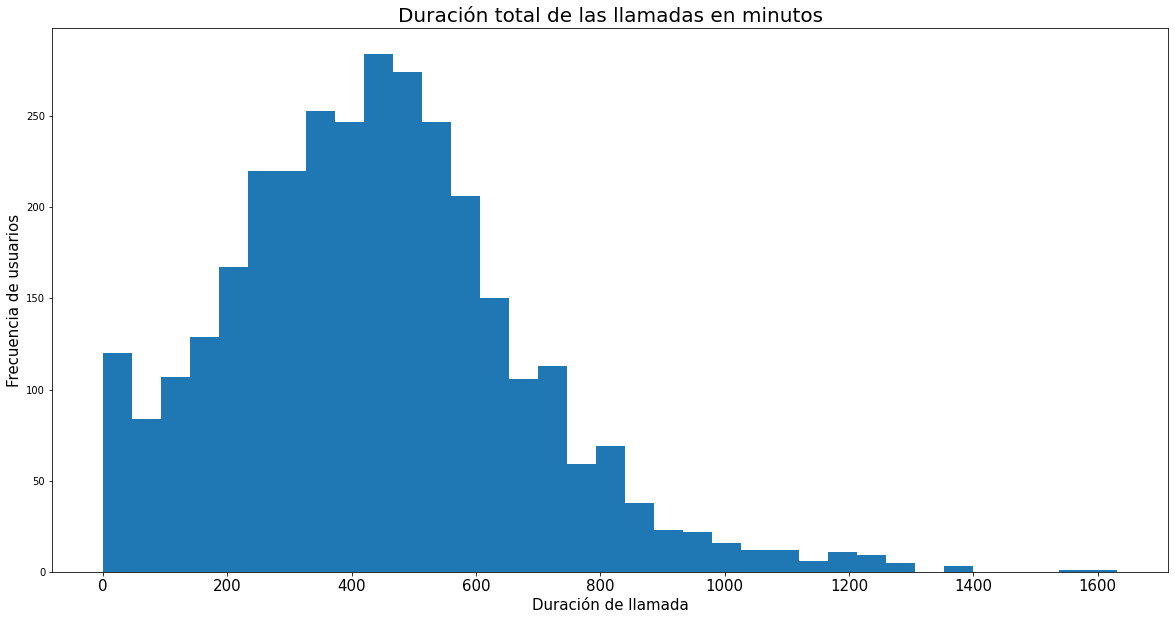

In [10]:
data["minutes"].plot(kind="hist", bins=35, figsize=(20,10))
plt.title("Duración total de las llamadas en minutos",fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Duración de llamada', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.show()

 Se verifica que no hayan valores menores a cero.

### Datos messages

In [11]:
data.query('messages.isna()')

,calls,minutes,messages,mb_used,is_ultra


No se encuentran valores ausentes.

In [12]:
data["messages"].unique()

array([ 83.,  56.,  86.,  81.,   1.,  21.,  20.,   6.,   3.,  38.,  13.,
        61.,  16.,   0.,   4.,  90.,  31.,  97.,  66.,  19.,  30.,  52.,
        48.,  44.,  27.,   7.,   9.,  43.,  33.,  34.,  10., 106.,  65.,
        17.,  11.,  29.,  75.,  47.,  49.,  64., 144.,  99.,  46.,  24.,
        22.,  55.,   8.,  93., 153.,  37.,  69.,  18.,  78.,  42.,  82.,
        62.,  40.,  57.,  60.,  58., 123.,  26.,  51., 109.,   5.,  39.,
        35.,  79.,  12., 182.,  36., 126.,  59., 102.,  14., 133., 110.,
        54.,  72., 103.,  23., 108.,  92.,  73.,  15.,  25.,  91., 113.,
       105.,  85., 191.,  32.,  50., 145.,  41., 150.,  53., 171., 176.,
        68.,  28.,  76.,  71., 118.,  63., 132.,  84.,   2.,  67., 111.,
       101.,  96., 112.,  95.,  89., 143.,  45.,  70.,  77.,  94., 137.,
       107.,  98., 141., 124., 129., 114.,  87.,  80., 117., 138., 142.,
       134., 128., 180., 115., 154.,  74., 185., 121., 127., 116.,  88.,
       140., 201., 100., 169., 155., 135., 151., 13

No se encuentran valores atipicos o menores a cero.

In [13]:
#Se convierte la callas a tipo int
data["messages"] = data["messages"].astype(int)

In [14]:
#Verificar conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


### Datos mb_used

In [15]:
data.query('mb_used.isna()')

,calls,minutes,messages,mb_used,is_ultra


No se encuentran valores ausentes.

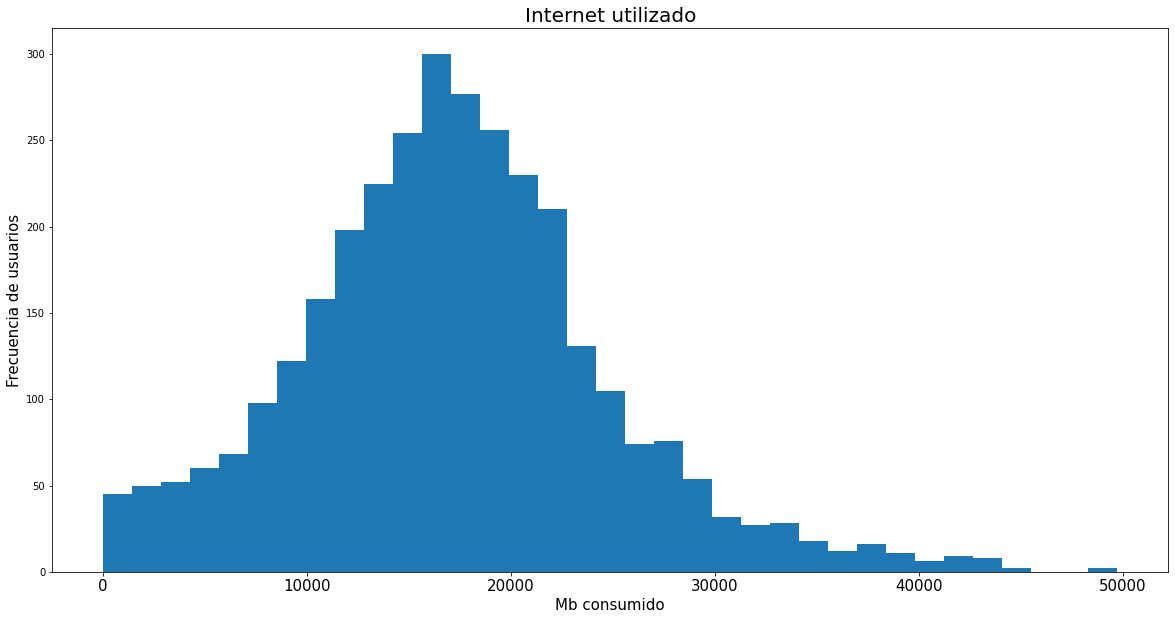

In [16]:
data["mb_used"].plot(kind="hist", bins=35, figsize=(20,10))
plt.title("Internet utilizado",fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Mb consumido', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.show()

No se encuentran valores menores a 0.

### Datos is_ultra

In [17]:
data.query('is_ultra.isna()')

,calls,minutes,messages,mb_used,is_ultra


No se encuentran valores ausentes.

In [18]:
data["is_ultra"].unique()

array([0, 1])

No se encuentran valores atípicos en los datos.

### Creación de variables features y target

In [19]:
#Se guarda en la variable todas las columnas execpto is_ultra
features = data.drop("is_ultra", axis=1)

In [20]:
#Verificar la variable
features.head()

,calls,minutes,messages,mb_used
0,40,311.90,83,19915.42
1,85,516.75,56,22696.96
2,77,467.66,86,21060.45
3,106,745.53,81,8437.39
4,66,418.74,1,14502.75


In [21]:
#Solo se guarda en la variable la columna is_ultra
target = data["is_ultra"]

In [22]:
#Se verifica la variable
target.head()

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

## Creación del modelo

### Segmentación de los conjuntos de entrenamiento y validación

A continuación, se segmentaran los datos en 2 partes. El 75% de los datos serán utilizados para entranamiento del modelo y el restante para su verificación.

In [23]:
(features_train, features_valid, 
 target_train, target_valid) = train_test_split(features, target, 
                                              test_size=0.40, random_state= 931106)
(features_valid, features_test,
target_valid, target_test) = train_test_split(features_valid, target_valid, 
                                              test_size=0.50, random_state= 931106)

In [24]:
print(f"Número de filas del conjunto de datos features_train: "
      ,features_train.shape[0])
print(f"Número de filas del conjunto de datos features_valid: "
      ,features_valid.shape[0])
print(f"Número de filas del conjunto de datos features_test: "
      ,features_test.shape[0])

Número de filas del conjunto de datos features_train:  1928
Número de filas del conjunto de datos features_valid:  643
Número de filas del conjunto de datos features_test:  643


Se puede observar que se dividió de manera adecuada el conjuntos de datos.

### Arbol de decisión

In [25]:
model = DecisionTreeClassifier(random_state=931106) 
model.fit(features_train, target_train) # entrena el modelo 
score = model.score(features_valid, target_valid) # calcula la exactitud
score_test = model.score(features_test, target_test) # calcula la exactitud
score_train = model.score(features_train, target_train) # calcula la exactitud

print("Exactitud del modelo en el conjunto de validación:", score) 
print("Exactitud del modelo en el conjunto de prueba:", score_test) 
print("Exactitud del modelo en el conjunto de entranmiento:", score_train) 


Exactitud del modelo en el conjunto de validación: 0.713841368584759
Exactitud del modelo en el conjunto de prueba: 0.7356143079315708
Exactitud del modelo en el conjunto de entranmiento: 1.0


La exactitud del modelo de validación es 71%, en el modelo de prueba mejora a 73%, pero se puede aprecia que existe un overfitting, debido a que en el conjunto de entranmiento tenemos el 100% de exactitud.

In [32]:
model = DecisionTreeClassifier(random_state=931106)
params = [{'max_depth': list(range(1, 20))}]
clf = GridSearchCV(model, params, cv = 20, scoring='accuracy')
clf.fit(features_train, target_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 5}
0.7899753006872852


In [27]:
model = DecisionTreeClassifier(random_state=931106, max_depth= 5) # crea un modelo con la profundidad proporcionada
model.fit(features_train, target_train)
print("",model.score(features_valid, target_valid))
print("",model.score(features_test, target_test))
print("",model.score(features_train, target_train))

 0.7900466562986003
 0.7947122861586314
 0.8127593360995851


In [28]:
best_model = None
best_score = 0
best_depth = 0
best_score_test = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=931106, max_depth= depth) # crea un modelo con la profundidad proporcionada
    model.fit(features_train, target_train) # entrena el modelo 
    score = model.score(features_valid, target_valid) # calcula la exactitud
    score_test = model.score(features_test, target_test)
    score_train = model.score(features_train, target_train) # calcula la exactitud

    if score > best_score:
        best_model = model
        best_score = score
        best_depth = depth
        best_score_test = score_test
print("Exactitud del mejor modelo en el conjunto de validación:", best_score) 
print("Exactitud del mejor modelo en el conjunto de test:", best_score_test)
print("Exactitud del modelo en el conjunto de entrenamiento:", score_train)
print("Max_depth= ", best_depth)

Exactitud del mejor modelo en el conjunto de validación: 0.807153965785381
Exactitud del mejor modelo en el conjunto de test: 0.807153965785381
Exactitud del modelo en el conjunto de entrenamiento: 0.8127593360995851
Max_depth=  3


Se puede observar que mejoró el modelo a 80% de exactitud en el conjunto de validación. La misma exactitud tiene el conjunto de test y el de entrenamiento un 81%. El modelo no presenta overfitting.

### Modelo bosque aleatorio

In [29]:
best_score = 0
best_est = 0
best_score_test = 0
for est in range(1, 20): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=931106, n_estimators=est) # configura el número de árboles
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_valid, target_valid) # calcula la puntuación de accuracy en el conjunto de validación
    score_test = model.score(features_test, target_test)
    score_train = model.score(features_train, target_train) # calcula la exactitud
    if score > best_score: # Se escoge el modelo con mejor 
        best_score = score
        best_est = est
        best_score_test = score_test

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))
print("Exactitud del mejor modelo en el conjunto de test: {}".format(best_score_test))
print("Exactitud del modelo en el conjunto de entrenamiento: {}".format(score_train))


Exactitud del mejor modelo en el conjunto de validación (n_estimators = 12): 0.8040435458786936
Exactitud del mejor modelo en el conjunto de test: 0.7962674961119751
Exactitud del modelo en el conjunto de entrenamiento: 0.9932572614107884


Se puede observar que mejoro un poco el modelo a una exactidud de 80% en el conjunto de validación, el conjunto de test se queda un poco abajo con 79%, pero hay un overfitting porque el conjuntos de entramiento tienen exactitud del 99%

A continuación se combinará el metodo de bosque aleatorio, modificando el hiperparametros max_depth.

In [30]:
best_score = 0
best_est = 0
best_depth = 0
best_score_test = 0

for est in range(1, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=931106, n_estimators = est, max_depth = depth) # configura el número de árboles
        model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        score = model.score(features_valid, target_valid) # calcula la puntuación de accuracy en el conjunto de validación
        score_test = model.score(features_test, target_test)
        score_train = model.score(features_train, target_train) # calcula la exactitud

        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
            best_score_test = score_test

print("Exactitud del modelo en el conjunto de validación: ", best_score)
print("Exactitud del modelo en el conjunto de test: ", best_score_test)
print("Exactitud del modelo en el conjunto de entrenamiento: ", score_train)

print("Max_depth: ", best_depth)
print("N_estimators: ", best_est)


Exactitud del modelo en el conjunto de validación:  0.8195956454121306
Exactitud del modelo en el conjunto de test:  0.8055987558320373
Exactitud del modelo en el conjunto de entrenamiento:  0.8755186721991701
Max_depth:  9
N_estimators:  8


Con n_estimators en 4 y max_depth en 7; se encontró una mejora en la exactitud del modelo. Ahora se tiene una exactitud del casi 82 en el modelo de validación; 80% en el conjunto de test y un 87% en el de entranmiento. Por consiguiente no presenta overfitting.

### Regresión logística

In [31]:
model = LogisticRegression(random_state=931106, solver='liblinear')  # inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
score_train = model.score(features_train, target_train) # calcula la puntuación de accuracy en el conjunto de entrenamiento
score_valid = model.score(features_valid, target_valid) # calcula la puntuación de accuracy en el conjunto de validación
score_valid = model.score(features_test, target_test) # calcula la puntuación de accuracy en el conjunto de validación

print("Exactitud del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Exactitud del modelo de regresión logística en el conjunto de validación:", score_valid)
print("Exactitud del modelo de regresión logística en el conjunto de test:", score_test)

Exactitud del modelo de regresión logística en el conjunto de entrenamiento: 0.7043568464730291
Exactitud del modelo de regresión logística en el conjunto de validación: 0.7247278382581649
Exactitud del modelo de regresión logística en el conjunto de test: 0.8102643856920684


Parace ser que la regresión logística no es tan buen modelo, presenta un 72% en el conjunto de validación; mejora a un 80% en el test, pero el conjunto de entramiento tiene 70%. Por consiguiente ahora el modelo esta underfitting.

## Conclusión

Se pudo observar que el mejor modelo fue la combinación de bosque aleatorio con arbol de decisión, el cual alcanzó una exactitud de casi el 82% en el conjunto de validación. Además, es el que tiene mejores resultados con respecto al conjunto de test y el modelo no presenta overfitting. A continuación, se enlistan los resultados:

1. Combinación bosque aleatorio y arbol de decisión: 82%.
2. Bosque aleatorio: 80%.
3. Arbol de decisión: 79%
4. Regresión logística: 70%

El modelo quedaría de la siguiente manera: 

model = RandomForestClassifier(random_state=931106, n_estimators = 4, max_depth = 7)